after applying pre-trained LFCC-LCNN model on the dataset, and exporting y_pred (predictions), plus applying EDLF-LR model using Weka and again exporting the predictions, we calculate our ensemble model:

In [ ]:
df_test = pd.read_excel('/content/drive/MyDrive/MySelfVersionProjects/datasets/Sample set 3/pred_test_LCNN.xlsx')


In [ ]:
df_test

,-,clipID,Clip ID,Score,y_true,Path,y_pred
0,.wav,Assem-10.wav,Assem-10,-7.469019,1,NaN,1
1,.wav,Assem-2.wav,Assem-2,-17.523005,1,NaN,1
2,.wav,Assem-3.wav,Assem-3,-8.708517,1,NaN,1
3,.wav,Assem-4.wav,Assem-4,-6.130847,1,NaN,1
4,.wav,Assem-5.wav,Assem-5,8.744884,1,NaN,0
...,...,...,...,...,...,...,...
90,.wav,wavenet-b.wav,wavenet-b,-9.772962,1,NaN,1
91,.wav,wavenet-c.wav,wavenet-c,-18.381493,1,NaN,1
92,.wav,wavenet-d.wav,wavenet-d,-12.781125,1,NaN,1
93,.wav,wavenet-x.wav,wavenet-x,-16.654339,1,NaN,1


In [ ]:
df_test2 = pd.read_excel('/content/drive/MyDrive/MySelfVersionProjects/datasets/Sample set 3/testing_sample_set3.xlsx')

In [ ]:
df_test_final = df_test.merge(df_test2, how='left', on='clipID')


In [ ]:
df_test_final

,-,clipID,Clip ID,Score,y_true_x,Path,y_pred,y_true_y,type,path,...,PauseAnomaly,BurstsAnomaly,intakeOrOuttakeofBreath,SoundQualityAnomay,sd,median,mode,IQR,skew,kurt
0,.wav,Assem-10.wav,Assem-10,-7.469019,1,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,.wav,Assem-2.wav,Assem-2,-17.523005,1,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,.wav,Assem-3.wav,Assem-3,-8.708517,1,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,.wav,Assem-4.wav,Assem-4,-6.130847,1,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,.wav,Assem-5.wav,Assem-5,8.744884,1,NaN,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,.wav,wavenet-b.wav,wavenet-b,-9.772962,1,NaN,1,1.0,WaveNet,/content/drive/MyDrive/MySelfVersionProjects/a...,...,0.0,0.0,0.0,1.0,1416.683708,739.5,226.5,1120.0,5.695426,47.597909
92,.wav,wavenet-c.wav,wavenet-c,-18.381493,1,NaN,1,1.0,WaveNet,/content/drive/MyDrive/MySelfVersionProjects/a...,...,0.0,0.0,0.0,1.0,1513.060017,971.0,217.0,1792.0,5.997975,55.409510
93,.wav,wavenet-d.wav,wavenet-d,-12.781125,1,NaN,1,1.0,WaveNet,/content/drive/MyDrive/MySelfVersionProjects/a...,...,0.0,0.0,0.0,1.0,1622.393440,1071.5,261.5,1446.5,3.814075,22.139741
94,.wav,wavenet-x.wav,wavenet-x,-16.654339,1,NaN,1,1.0,WaveNet,/content/drive/MyDrive/MySelfVersionProjects/a...,...,0.0,0.0,0.0,1.0,1313.441360,520.5,375.5,927.5,6.175250,49.675814


In [ ]:
df_test_final.to_excel("output_test_with_path.xlsx")

In [ ]:
import json
import os
import math
import librosa

from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import librosa
import librosa.display

import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import os
import sys
import warnings
# ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
import json
import os
import math
import librosa
import numpy as np


from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

In [ ]:
df_train = pd.read_excel('/content/drive/MyDrive/MySelfVersionProjects/datasets/Sample set 3/pred_train_LCNN.xlsx')


In [ ]:
df_train

,-,clipID,clip_ID,Score,y_true,Path,y_pred
0,.wav,Assem-11.wav,Assem-11,-7.364742,1,NaN,1
1,.wav,Assem-12.wav,Assem-12,-4.801428,1,NaN,1
2,.wav,Assem-13.wav,Assem-13,-10.213069,1,NaN,1
3,.wav,Assem-14.wav,Assem-14,-19.075678,1,NaN,1
4,.wav,Assem-15.wav,Assem-15,-17.803907,1,NaN,1
...,...,...,...,...,...,...,...
193,.wav,wavenet5.wav,wavenet5,-9.561719,1,NaN,1
194,.wav,wavenet6.wav,wavenet6,-30.478806,1,NaN,1
195,.wav,wavenet7.wav,wavenet7,-15.108932,1,NaN,1
196,.wav,wavenet8.wav,wavenet8,-12.619382,1,NaN,1


In [ ]:
df_train2 = pd.read_excel('/content/drive/MyDrive/MySelfVersionProjects/datasets/Sample set 3/training+val_sample_set3.xlsx')

In [ ]:
df_train_final = df_train.merge(df_train2, how='left', on='clipID')


In [ ]:
df_train_final

,-,clipID,clip_ID,Score,y_true_x,Path,y_pred,y_true_y,type,path,...,PauseAnomaly,BurstsAnomaly,intakeOrOuttakeofBreath,SoundQualityAnomay,sd,median,mode,IQR,skew,kurt
0,.wav,Assem-11.wav,Assem-11,-7.364742,1,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,.wav,Assem-12.wav,Assem-12,-4.801428,1,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,.wav,Assem-13.wav,Assem-13,-10.213069,1,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,.wav,Assem-14.wav,Assem-14,-19.075678,1,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,.wav,Assem-15.wav,Assem-15,-17.803907,1,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,.wav,wavenet5.wav,wavenet5,-9.561719,1,NaN,1,1.0,WaveNet,/content/drive/MyDrive/MySelfVersionProjects/a...,...,0.0,0.0,0.0,1.0,1992.853607,769.0,700.0,1113.0,4.547085,28.215452
194,.wav,wavenet6.wav,wavenet6,-30.478806,1,NaN,1,1.0,WaveNet,/content/drive/MyDrive/MySelfVersionProjects/a...,...,0.0,0.0,0.0,1.0,2006.370840,630.0,376.0,1859.0,6.186763,50.318348
195,.wav,wavenet7.wav,wavenet7,-15.108932,1,NaN,1,1.0,WaveNet,/content/drive/MyDrive/MySelfVersionProjects/a...,...,0.0,0.0,0.0,1.0,1940.951732,717.5,424.0,1714.5,5.904599,47.967308
196,.wav,wavenet8.wav,wavenet8,-12.619382,1,NaN,1,1.0,WaveNet,/content/drive/MyDrive/MySelfVersionProjects/a...,...,0.0,0.0,0.0,1.0,2289.530067,669.5,345.0,2040.0,7.112222,72.734712


In [ ]:
df_train_final.to_excel("output_train_with_path.xlsx")

In [ ]:
df_test = pd.read_excel('output_test_with_path.xlsx')

NameError: ignored

## REading data (train)
I will put these data for lcnn in its ensemlble code folder, for ML in Anna ML result folder shared with Anna

In [ ]:
df_train_lcnn = pd.read_excel('/content/drive/MyDrive/MySelfVersionProjects/Codes/Sample_set_3_codes/Ensemble models/LCNN (ASVspoof2021 plus EDLFs)/output_train_with_path.xlsx')

In [ ]:
df_train_edlf_lr = pd.read_excel('/content/output_edlf_lr.xlsx', sheet_name='train')

In [ ]:
df_train_edlf_freq_lr = pd.read_excel('/content/output_edlfandfreqLR.xlsx', sheet_name='train')

In [ ]:
df_train_lcnn

,Unnamed: 0,-,clipID,clip_ID,Score,y_true,y_pred,type,path
0,0,.wav,Assem-11.wav,Assem-11,-7.364742,1,1,NaN,/content/drive/MyDrive/MySelfVersionProjects/a...
1,1,.wav,Assem-12.wav,Assem-12,-4.801428,1,1,NaN,/content/drive/MyDrive/MySelfVersionProjects/a...
2,2,.wav,Assem-13.wav,Assem-13,-10.213069,1,1,NaN,/content/drive/MyDrive/MySelfVersionProjects/a...
3,3,.wav,Assem-14.wav,Assem-14,-19.075678,1,1,NaN,/content/drive/MyDrive/MySelfVersionProjects/a...
4,4,.wav,Assem-15.wav,Assem-15,-17.803907,1,1,NaN,/content/drive/MyDrive/MySelfVersionProjects/a...
...,...,...,...,...,...,...,...,...,...
193,193,.wav,wavenet5.wav,wavenet5,-9.561719,1,1,WaveNet,/content/drive/MyDrive/MySelfVersionProjects/a...
194,194,.wav,wavenet6.wav,wavenet6,-30.478806,1,1,WaveNet,/content/drive/MyDrive/MySelfVersionProjects/a...
195,195,.wav,wavenet7.wav,wavenet7,-15.108932,1,1,WaveNet,/content/drive/MyDrive/MySelfVersionProjects/a...
196,196,.wav,wavenet8.wav,wavenet8,-12.619382,1,1,WaveNet,/content/drive/MyDrive/MySelfVersionProjects/a...


In [ ]:
df_train_edlf_lr

,path,inst#,actual,predicted,error,prediction
0,/content/drive/MyDrive/MySelfVersionProjects/a...,1,0,0,NaN,0.763
1,/content/drive/MyDrive/MySelfVersionProjects/a...,2,0,0,NaN,0.763
2,/content/drive/MyDrive/MySelfVersionProjects/a...,3,0,0,NaN,0.763
3,/content/drive/MyDrive/MySelfVersionProjects/a...,4,0,0,NaN,0.942
4,/content/drive/MyDrive/MySelfVersionProjects/a...,5,0,0,NaN,0.763
...,...,...,...,...,...,...
234,/content/drive/MyDrive/MySelfVersionProjects/a...,235,1,0,+,0.763
235,/content/drive/MyDrive/MySelfVersionProjects/a...,236,1,1,NaN,0.988
236,/content/drive/MyDrive/MySelfVersionProjects/a...,237,1,1,NaN,0.988
237,/content/drive/MyDrive/MySelfVersionProjects/a...,238,1,1,NaN,0.988


In [ ]:
df_ensbm_train = pd.merge(df_train_edlf_lr, df_train_edlf_freq_lr, on='path')

In [ ]:
df_ensbm_train
# predicted_x is from edlf alone and predicted_y is from edlf+freq

,path,inst#_x,actual_x,predicted_x,error_x,prediction_x,inst#_y,actual_y,predicted_y,error_y,prediction_y
0,/content/drive/MyDrive/MySelfVersionProjects/a...,1,0,0,NaN,0.763,1,0,0,NaN,0.819
1,/content/drive/MyDrive/MySelfVersionProjects/a...,2,0,0,NaN,0.763,2,0,0,NaN,0.843
2,/content/drive/MyDrive/MySelfVersionProjects/a...,3,0,0,NaN,0.763,3,0,0,NaN,0.872
3,/content/drive/MyDrive/MySelfVersionProjects/a...,4,0,0,NaN,0.942,4,0,0,NaN,0.952
4,/content/drive/MyDrive/MySelfVersionProjects/a...,5,0,0,NaN,0.763,5,0,0,NaN,0.833
...,...,...,...,...,...,...,...,...,...,...,...
240,/content/drive/MyDrive/MySelfVersionProjects/a...,235,1,0,+,0.763,235,1,0,+,0.664
241,/content/drive/MyDrive/MySelfVersionProjects/a...,236,1,1,NaN,0.988,236,1,1,NaN,0.980
242,/content/drive/MyDrive/MySelfVersionProjects/a...,237,1,1,NaN,0.988,237,1,1,NaN,0.994
243,/content/drive/MyDrive/MySelfVersionProjects/a...,238,1,1,NaN,0.988,238,1,1,NaN,0.995


In [ ]:
df_ensbm_train2 = pd.merge(df_ensbm_train, df_train_lcnn, on='path')

In [ ]:
df_ensbm_train = df_ensbm_train2

In [ ]:
copy_df_ensbm_train = df_ensbm_train
copy_df_train_lcnn = df_train_lcnn
copy_df_ensbm_train_path = copy_df_ensbm_train["path"].to_numpy()
copy_df_train_lcnn = copy_df_train_lcnn["path"].to_numpy()
list(set(copy_df_ensbm_train_path) - set(copy_df_train_lcnn))
#list(set(copy_df_train_lcnn) - set(copy_df_ensbm_train_path))
 #'/content/drive/MyDrive/MySelfVersionProjects/audio sample/sample set3 whole data/real/obama 6.wav',


['/content/drive/MyDrive/MySelfVersionProjects/audio sample/sample set3 whole data/fake/cotatron3.wav',
 '/content/drive/MyDrive/MySelfVersionProjects/audio sample/sample set3 whole data/fake/New obama fake 1.wav',
 '/content/drive/MyDrive/MySelfVersionProjects/audio sample/sample set3 whole data/fake/New Obama Fake 2.wav',
 '/content/drive/MyDrive/MySelfVersionProjects/audio sample/sample set3 whole data/fake/New Obama fake 16.wav',
 '/content/drive/MyDrive/MySelfVersionProjects/audio sample/sample set3 whole data/fake/New Obama Fake 5.wav',
 '/content/drive/MyDrive/MySelfVersionProjects/audio sample/sample set3 whole data/fake/New Obama fake 6.wav',
 '/content/drive/MyDrive/MySelfVersionProjects/audio sample/sample set3 whole data/fake/New Obama fake 20.wav',
 '/content/drive/MyDrive/MySelfVersionProjects/audio sample/sample set3 whole data/real/LJ046-0201.wav',
 '/content/drive/MyDrive/MySelfVersionProjects/audio sample/sample set3 whole data/fake/Audio clip 6.wav',
 '/content/drive

In [ ]:
## for test data

In [ ]:
df_test_lcnn = pd.read_excel('/content/drive/MyDrive/MySelfVersionProjects/Codes/Sample_set_3_codes/Ensemble models/LCNN (ASVspoof2021 plus EDLFs)/output_test_with_path.xlsx')

In [ ]:
df_test_edlf_lr = pd.read_excel('/content/output_edlf_lr.xlsx', sheet_name='test')

In [ ]:
df_test_edlf_freq_lr = pd.read_excel('/content/output_edlfandfreqLR.xlsx', sheet_name='test')

In [ ]:
df_test_lcnn

,Unnamed: 0,-,clipID,Score,y_true,y_pred,type,path
0,0,.wav,Assem-10.wav,-7.469019,1,1,NaN,/content/drive/MyDrive/MySelfVersionProjects/a...
1,1,.wav,Assem-2.wav,-17.523005,1,1,NaN,/content/drive/MyDrive/MySelfVersionProjects/a...
2,2,.wav,Assem-3.wav,-8.708517,1,1,NaN,/content/drive/MyDrive/MySelfVersionProjects/a...
3,3,.wav,Assem-4.wav,-6.130847,1,1,NaN,/content/drive/MyDrive/MySelfVersionProjects/a...
4,4,.wav,Assem-5.wav,8.744884,1,0,NaN,/content/drive/MyDrive/MySelfVersionProjects/a...
...,...,...,...,...,...,...,...,...
91,91,.wav,wavenet-b.wav,-9.772962,1,1,WaveNet,/content/drive/MyDrive/MySelfVersionProjects/a...
92,92,.wav,wavenet-c.wav,-18.381493,1,1,WaveNet,/content/drive/MyDrive/MySelfVersionProjects/a...
93,93,.wav,wavenet-d.wav,-12.781125,1,1,WaveNet,/content/drive/MyDrive/MySelfVersionProjects/a...
94,94,.wav,wavenet-x.wav,-16.654339,1,1,WaveNet,/content/drive/MyDrive/MySelfVersionProjects/a...


In [ ]:
df_ensbm_test = pd.merge(df_test_edlf_lr, df_test_edlf_freq_lr, on='path')

In [ ]:
df_ensbm_test
# predicted_x is from edlf alone and predicted_y is from edlf+freq

,path,inst#_x,actual_x,predicted_x,error_x,prediction_x,inst#_y,actual_y,predicted_y,error_y,prediction_y
0,/content/drive/MyDrive/MySelfVersionProjects/a...,1,0,0,NaN,0.942,1,0,0,NaN,0.915
1,/content/drive/MyDrive/MySelfVersionProjects/a...,2,0,1,+,0.515,2,0,0,NaN,0.573
2,/content/drive/MyDrive/MySelfVersionProjects/a...,3,0,1,+,0.997,3,0,1,+,0.999
3,/content/drive/MyDrive/MySelfVersionProjects/a...,4,0,0,NaN,0.763,4,0,0,NaN,0.655
4,/content/drive/MyDrive/MySelfVersionProjects/a...,5,0,0,NaN,0.942,5,0,0,NaN,0.993
...,...,...,...,...,...,...,...,...,...,...,...
100,/content/drive/MyDrive/MySelfVersionProjects/a...,99,1,1,NaN,0.988,99,1,1,NaN,0.878
101,/content/drive/MyDrive/MySelfVersionProjects/a...,100,1,1,NaN,0.997,100,1,1,NaN,0.996
102,/content/drive/MyDrive/MySelfVersionProjects/a...,101,1,1,NaN,0.847,101,1,1,NaN,0.569
103,/content/drive/MyDrive/MySelfVersionProjects/a...,102,1,1,NaN,0.997,102,1,1,NaN,0.999


In [ ]:
df_ensbm_test2 = pd.merge(df_ensbm_test, df_test_lcnn, on='path')

In [ ]:
copy_df_ensbm_train = df_ensbm_train
copy_df_train_lcnn = df_train_lcnn
copy_df_ensbm_train_path = copy_df_ensbm_train["path"].to_numpy()
copy_df_train_lcnn = copy_df_train_lcnn["path"].to_numpy()
list(set(copy_df_ensbm_train_path) - set(copy_df_train_lcnn))
#list(set(copy_df_train_lcnn) - set(copy_df_ensbm_train_path))
 #'/content/drive/MyDrive/MySelfVersionProjects/audio sample/sample set3 whole data/real/obama 6.wav',


[]

In [ ]:
df_ensbm_test = df_ensbm_test2

## Ensmeble setup : EDLF with LR | LFCCs with LCNN

In [ ]:
df_ensbm_train

,path,inst#_x,actual_x,predicted_x,error_x,prediction_x,inst#_y,actual_y,predicted_y,error_y,...,Unnamed: 0,-,clipID,clip_ID,Score,y_true,y_pred,type,estimate,pred_final_1
0,/content/drive/MyDrive/MySelfVersionProjects/a...,1,0,0,NaN,0.763,1,0,0,NaN,...,153,.wav,obama3.wav,obama3,9.749711,0,0,NaN,0.000000,0
1,/content/drive/MyDrive/MySelfVersionProjects/a...,2,0,0,NaN,0.763,2,0,0,NaN,...,154,.wav,obama4.wav,obama4,1.962084,0,0,NaN,0.333333,0
2,/content/drive/MyDrive/MySelfVersionProjects/a...,3,0,0,NaN,0.763,3,0,0,NaN,...,155,.wav,obama5.wav,obama5,-2.804573,0,0,NaN,0.666667,0
3,/content/drive/MyDrive/MySelfVersionProjects/a...,4,0,0,NaN,0.942,4,0,0,NaN,...,156,.wav,obama6.wav,obama6,6.920632,0,0,NaN,0.000000,0
4,/content/drive/MyDrive/MySelfVersionProjects/a...,5,0,0,NaN,0.763,5,0,0,NaN,...,157,.wav,obama7.wav,obama7,-11.839888,0,1,NaN,0.333333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,/content/drive/MyDrive/MySelfVersionProjects/a...,234,1,1,NaN,0.997,234,1,1,NaN,...,163,.wav,obama_fake32.wav,obama_fake32,-7.590486,1,1,NaN,NaN,1
203,/content/drive/MyDrive/MySelfVersionProjects/a...,236,1,1,NaN,0.988,236,1,1,NaN,...,71,.wav,E_1008248.wav,E_1008248,5.453457,1,0,replay attack,NaN,1
204,/content/drive/MyDrive/MySelfVersionProjects/a...,237,1,1,NaN,0.988,237,1,1,NaN,...,74,.wav,E_1008343.wav,E_1008343,8.188787,1,0,replay attack,NaN,1
205,/content/drive/MyDrive/MySelfVersionProjects/a...,238,1,1,NaN,0.988,238,1,1,NaN,...,45,.wav,E_1000790.wav,E_1000790,12.182796,1,0,replay attack,NaN,1


In [ ]:
#prediction of the linguistic features with lr
pred_1 = df_ensbm_train['predicted_x']

In [ ]:
pred_2 = df_ensbm_train['y_pred']

In [ ]:
df_ensbm_train["estimate2"] = (pred_1+pred_2)/2

In [ ]:
pred_final = []
for i in range (0,207):
  if df_ensbm_train.iloc[i,21] > 0.1:
    pred_final.append(1)
  else:
    pred_final.append(0)
print(pred_final)

[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
df_ensbm_train.iloc[:,16]

0      0
1      0
2      0
3      0
4      0
      ..
202    1
203    1
204    1
205    1
206    1
Name: y_true, Length: 207, dtype: int64

In [ ]:
df_ensbm_train["pred_final_lfcc_lingu"] = pred_final

In [ ]:
acc = []
for i in range (0, 207):
  if df_ensbm_train.iloc[i,16]==df_ensbm_train.iloc[i,22]:
    acc.append(1)

print('Training Ensmeble Model accuracy is ' + str(len(acc)/len(df_ensbm_train)))

Training Ensmeble Model accuracy is 0.6763285024154589


In [ ]:
y_pred = df_ensbm_train['pred_final_lfcc_lingu']
y_true = df_ensbm_train['y_true']

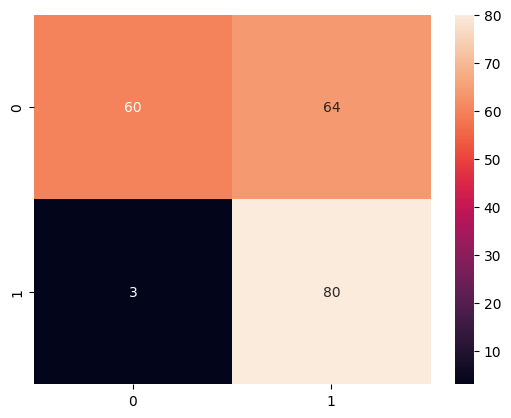

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
f = sns.heatmap(cm, annot=True, fmt='d')
# tpr= 0.96 fpr=0.51

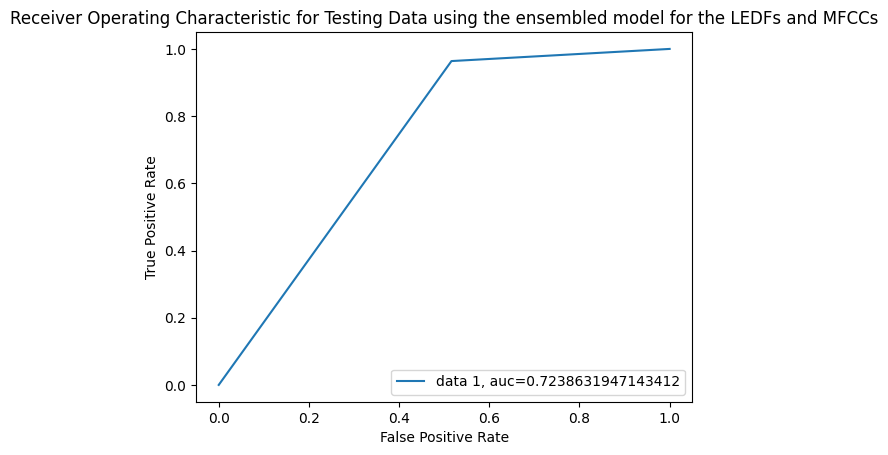

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_true,  y_pred)
auc = metrics.roc_auc_score(y_true, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title('Receiver Operating Characteristic for Training Data using the ensembled model for the LEDFs and MFCCs')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### for test data

In [ ]:
df_ensbm_test

,path,inst#_x,actual_x,predicted_x,error_x,prediction_x,inst#_y,actual_y,predicted_y,error_y,prediction_y,Unnamed: 0,-,clipID,Score,y_true,y_pred,type,estimate,pred_final_1
0,/content/drive/MyDrive/MySelfVersionProjects/a...,1,0,0,NaN,0.942,1,0,0,NaN,0.915,39,.wav,E_1009181.wav,0.073906,0,0,genuine,0.000000,0
1,/content/drive/MyDrive/MySelfVersionProjects/a...,2,0,1,+,0.515,2,0,0,NaN,0.573,36,.wav,E_1007616.wav,-17.430067,0,1,genuine,0.666667,1
2,/content/drive/MyDrive/MySelfVersionProjects/a...,3,0,1,+,0.997,3,0,1,+,0.999,22,.wav,E_1000600.wav,3.840549,0,0,genuine,0.666667,1
3,/content/drive/MyDrive/MySelfVersionProjects/a...,4,0,0,NaN,0.763,4,0,0,NaN,0.655,40,.wav,E_1010238.wav,9.211411,0,0,genuine,0.000000,0
4,/content/drive/MyDrive/MySelfVersionProjects/a...,5,0,0,NaN,0.942,5,0,0,NaN,0.993,35,.wav,E_1007135.wav,-8.876215,0,1,genuine,0.333333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,/content/drive/MyDrive/MySelfVersionProjects/a...,99,1,1,NaN,0.988,99,1,1,NaN,0.878,23,.wav,E_1000638.wav,-5.841262,1,1,replay attack,1.000000,1
97,/content/drive/MyDrive/MySelfVersionProjects/a...,100,1,1,NaN,0.997,100,1,1,NaN,0.996,24,.wav,E_1000712.wav,-2.482807,1,0,replay attack,0.666667,1
98,/content/drive/MyDrive/MySelfVersionProjects/a...,101,1,1,NaN,0.847,101,1,1,NaN,0.569,37,.wav,E_1007730.wav,6.283506,1,0,replay attack,0.666667,1
99,/content/drive/MyDrive/MySelfVersionProjects/a...,102,1,1,NaN,0.997,102,1,1,NaN,0.999,15,.wav,E_1000160.wav,-1.755551,1,0,replay attack,0.666667,1


In [ ]:
pred_1 = df_ensbm_test['predicted_x']

In [ ]:
pred_2 = df_ensbm_test['y_pred']

In [ ]:
df_ensbm_test["estimate2"] = (pred_1+pred_2)/2

In [ ]:
df_ensbm_test

,path,inst#_x,actual_x,predicted_x,error_x,prediction_x,inst#_y,actual_y,predicted_y,error_y,...,Unnamed: 0,-,clipID,Score,y_true,y_pred,type,estimate,pred_final_1,estimate2
0,/content/drive/MyDrive/MySelfVersionProjects/a...,1,0,0,NaN,0.942,1,0,0,NaN,...,39,.wav,E_1009181.wav,0.073906,0,0,genuine,0.0,0,0.0
1,/content/drive/MyDrive/MySelfVersionProjects/a...,2,0,1,+,0.515,2,0,0,NaN,...,36,.wav,E_1007616.wav,-17.430067,0,1,genuine,0.5,1,1.0
2,/content/drive/MyDrive/MySelfVersionProjects/a...,3,0,1,+,0.997,3,0,1,+,...,22,.wav,E_1000600.wav,3.840549,0,0,genuine,1.0,1,0.5
3,/content/drive/MyDrive/MySelfVersionProjects/a...,4,0,0,NaN,0.763,4,0,0,NaN,...,40,.wav,E_1010238.wav,9.211411,0,0,genuine,0.0,0,0.0
4,/content/drive/MyDrive/MySelfVersionProjects/a...,5,0,0,NaN,0.942,5,0,0,NaN,...,35,.wav,E_1007135.wav,-8.876215,0,1,genuine,0.0,0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,/content/drive/MyDrive/MySelfVersionProjects/a...,99,1,1,NaN,0.988,99,1,1,NaN,...,23,.wav,E_1000638.wav,-5.841262,1,1,replay attack,1.0,1,1.0
97,/content/drive/MyDrive/MySelfVersionProjects/a...,100,1,1,NaN,0.997,100,1,1,NaN,...,24,.wav,E_1000712.wav,-2.482807,1,0,replay attack,1.0,1,0.5
98,/content/drive/MyDrive/MySelfVersionProjects/a...,101,1,1,NaN,0.847,101,1,1,NaN,...,37,.wav,E_1007730.wav,6.283506,1,0,replay attack,1.0,1,0.5
99,/content/drive/MyDrive/MySelfVersionProjects/a...,102,1,1,NaN,0.997,102,1,1,NaN,...,15,.wav,E_1000160.wav,-1.755551,1,0,replay attack,1.0,1,0.5


In [ ]:
df_ensbm_test.iloc[:,15]

0      0
1      0
2      0
3      0
4      0
      ..
96     1
97     1
98     1
99     1
100    1
Name: y_true, Length: 101, dtype: int64

In [ ]:
pred_final = []
for i in range (0,101):
  if df_ensbm_test.iloc[i,20] > 0.1:
    pred_final.append(1)
  else:
    pred_final.append(0)
print(pred_final)



[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
df_ensbm_test["pred_final_1fccLingu"] = pred_final

In [ ]:
y_pred = df_ensbm_test['pred_final_1fccLingu']

In [ ]:
y_true = df_ensbm_test['y_true']

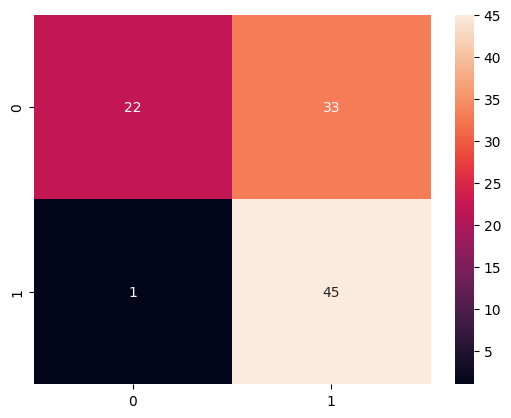

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
f = sns.heatmap(cm, annot=True, fmt='d')
# tpr = 0.97 fpr=0.6

In [ ]:
acc = []
for i in range (0, 101):
  if df_ensbm_test.iloc[i,21]==df_ensbm_test.iloc[i,15]:
    acc.append(1)

print('Testing Ensmeble Model accuracy is ' + str(len(acc)/len(df_ensbm_test)))

Testing Ensmeble Model accuracy is 0.6633663366336634


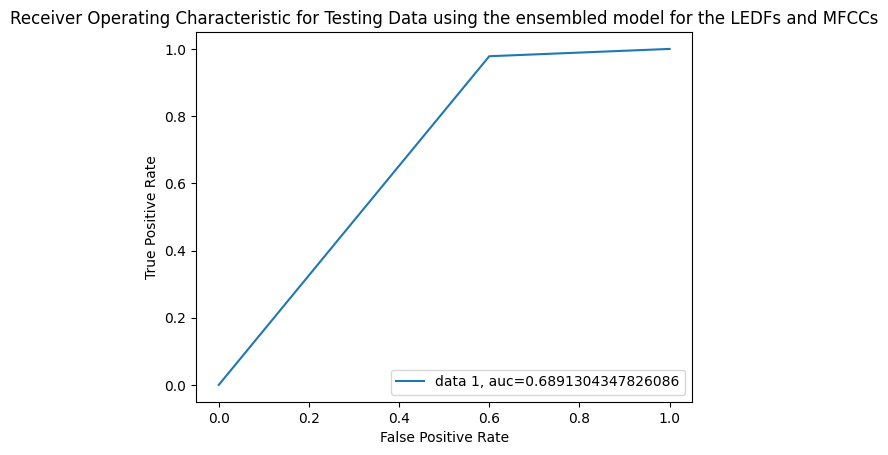

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_true,  y_pred)
auc = metrics.roc_auc_score(y_true, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title('Receiver Operating Characteristic for Testing Data using the ensembled model for the LEDFs and MFCCs')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()